In [44]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets , layers , models

In [45]:
(X_train , y_train) ,  (X_test , y_test) = datasets.fashion_mnist.load_data()

In [46]:
X_train.shape , X_test.shape , y_train.shape , y_test.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

In [47]:
def plot(X,y,index):
  plt.matshow(X[index])
  plt.xlabel(y[index])

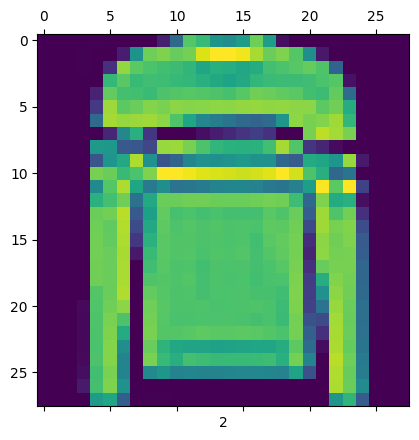

In [48]:
plot(X_train,y_train,5)

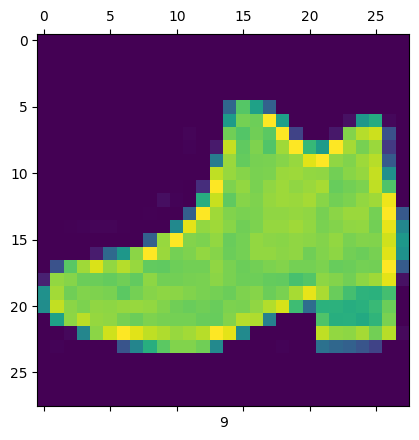

In [49]:
plot(X_train,y_train,15)

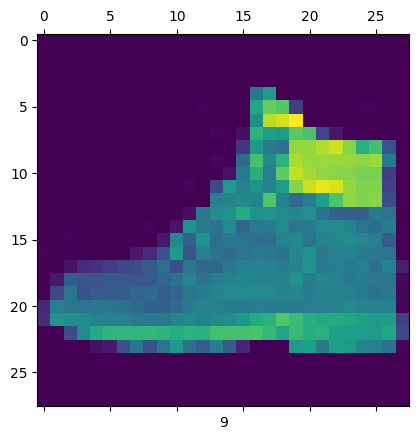

In [50]:
plot(X_train,y_train,90)

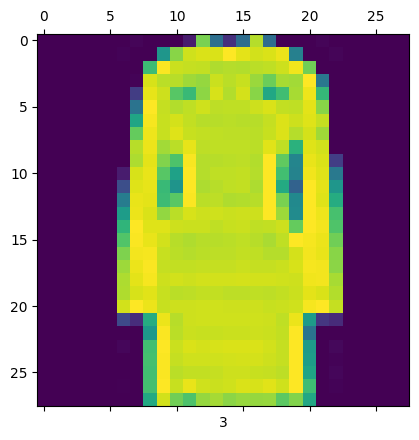

In [51]:
plot(X_train,y_train,500)

In [52]:
X_train , X_test = X_train / 255 , X_test / 255

In [53]:
import pandas as pd
df=pd.DataFrame({"Y":y_train})
df.value_counts()

Y
0    6000
1    6000
2    6000
3    6000
4    6000
5    6000
6    6000
7    6000
8    6000
9    6000
Name: count, dtype: int64

In [54]:
np.random.seed(30)
ann=models.Sequential([
    layers.Flatten(input_shape=(28,28)),
    layers.Dense(3000,activation="relu"),
    layers.Dense(1000,activation="relu"),
    layers.Dense(10,activation="sigmoid")
    ])
ann.compile(optimizer="SGD" , loss="sparse_categorical_crossentropy" , metrics=["accuracy"])
ann.fit(X_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.6397 - accuracy: 0.7911
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4543 - accuracy: 0.8423
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4114 - accuracy: 0.8572
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3860 - accuracy: 0.8648
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3667 - accuracy: 0.8719


In [55]:
from sklearn.metrics import ConfusionMatrixDisplay , classification_report
y_pred=ann.predict(X_test)
y_pred_classes=[np.argmax(i) for i in y_pred]
print(classification_report(y_test,y_pred_classes))

313/313 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.67      0.94      0.78      1000
           1       0.98      0.96      0.97      1000
           2       0.70      0.85      0.77      1000
           3       0.88      0.84      0.86      1000
           4       0.84      0.65      0.74      1000
           5       0.95      0.94      0.95      1000
           6       0.75      0.48      0.58      1000
           7       0.91      0.94      0.93      1000
           8       0.96      0.95      0.95      1000
           9       0.95      0.94      0.95      1000

    accuracy                           0.85     10000
   macro avg       0.86      0.85      0.85     10000
weighted avg       0.86      0.85      0.85     10000



In [56]:
np.random.seed(30)
cnn = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])
cnn.compile(optimizer="adam" , loss="sparse_categorical_crossentropy" , metrics=["accuracy"])
cnn.fit(X_train , y_train , epochs=10 , batch_size=32)

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 0.4442 - accuracy: 0.8396
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2954 - accuracy: 0.8924
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2508 - accuracy: 0.9074
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2178 - accuracy: 0.9201
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1928 - accuracy: 0.9291
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1704 - accuracy: 0.9357
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1505 - accuracy: 0.9437
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1328 - accuracy: 0.9500
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1166 - accuracy: 0.9564
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.105

In [57]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2903 - accuracy: 0.9120


[0.2902984321117401, 0.9120000004768372]

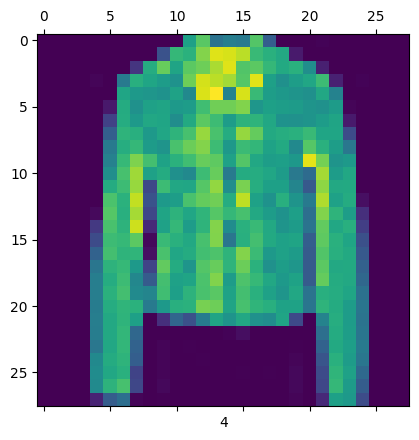

In [58]:
plot(X_test,y_test,10)

In [59]:
y_pred=cnn.predict(X_test)
y_pred[:10]

313/313 [==============================] - 1s 2ms/step


array([[5.35718891e-09, 5.96059174e-11, 7.11318374e-12, 3.22854937e-12,
        3.10292521e-11, 3.74479043e-08, 1.13341671e-11, 1.05700630e-08,
        1.07674876e-11, 1.00000000e+00],
       [8.48045329e-06, 8.18539098e-14, 9.99981165e-01, 2.03496210e-13,
        5.05604191e-07, 2.14806454e-14, 9.81003086e-06, 6.72994146e-16,
        4.84409561e-12, 2.93721380e-15],
       [7.28480332e-11, 1.00000000e+00, 1.15877325e-11, 1.02104098e-11,
        5.12933439e-14, 5.56278881e-21, 2.01576138e-14, 1.01443574e-21,
        7.62412926e-16, 8.39052189e-21],
       [1.36953004e-09, 1.00000000e+00, 1.52535918e-11, 1.68497161e-09,
        9.49270027e-14, 2.43640112e-15, 1.66267200e-09, 6.24920130e-17,
        6.34113259e-15, 3.59852394e-18],
       [5.89397311e-01, 3.13803028e-09, 7.00662204e-04, 8.38207052e-06,
        7.05699786e-04, 3.83999971e-10, 4.09188002e-01, 6.69325750e-09,
        1.06708017e-10, 4.64637790e-12],
       [1.92515615e-10, 1.00000000e+00, 3.36710354e-10, 6.06169574e-13,
   

In [60]:
y_classes=[np.argmax(i) for i in y_pred]
y_classes[:10]

[9, 2, 1, 1, 0, 1, 4, 6, 5, 7]

In [61]:
y_test[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7], dtype=uint8)

In [62]:
print(classification_report(y_test,y_pred_classes))

              precision    recall  f1-score   support

           0       0.67      0.94      0.78      1000
           1       0.98      0.96      0.97      1000
           2       0.70      0.85      0.77      1000
           3       0.88      0.84      0.86      1000
           4       0.84      0.65      0.74      1000
           5       0.95      0.94      0.95      1000
           6       0.75      0.48      0.58      1000
           7       0.91      0.94      0.93      1000
           8       0.96      0.95      0.95      1000
           9       0.95      0.94      0.95      1000

    accuracy                           0.85     10000
   macro avg       0.86      0.85      0.85     10000
weighted avg       0.86      0.85      0.85     10000



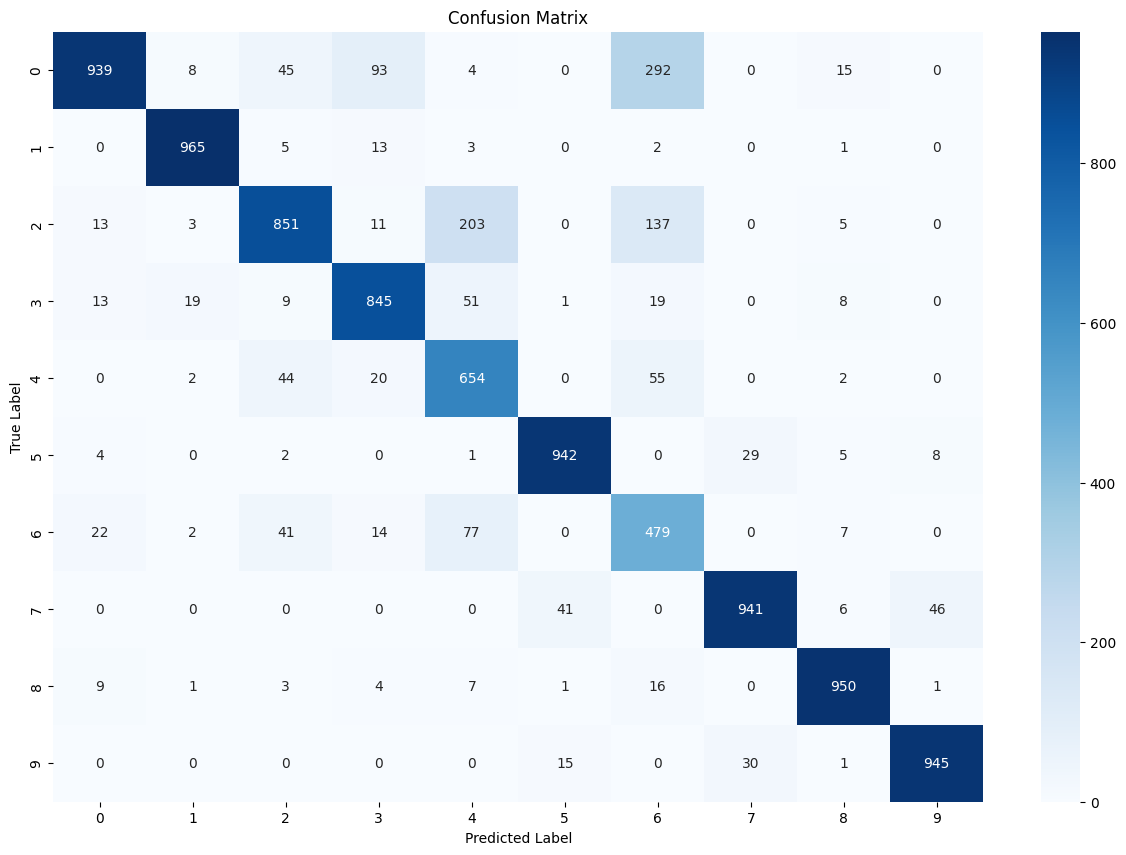

In [64]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
fig,ax=plt.subplots(figsize=(15,10));
ax=sns.heatmap(confusion_matrix(y_pred_classes , y_test), annot=True, fmt='d', cmap='Blues');
plt.xlabel('Predicted Label');
plt.ylabel('True Label');
plt.title('Confusion Matrix');
plt.show();
